In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import sympy
from sympy import init_printing
init_printing(use_latex=True)

In [2]:
up = np.array([1, 0])
down = np.array([0, 1])
I = np.array([[1, 0],[0, 1]])
s_x = np.array([[0, 1],[1, 0]])
s_y = np.array([[0, -1j],[1j, 0]])
s_z = np.array([[1, 0],[0, -1]])

s_p = s_x + 1j*s_y
s_m = s_x - 1j*s_y

zz = np.kron(s_z,s_z)

In [3]:
def h_tfim(j,g,N):
    H = -j*zz + g*(np.kron(s_x,I) + np.kron(I,s_x)) - 1e-6*(np.kron(s_z,I) + np.kron(I,s_z))
    for i in range(3,N+1):
        H = np.kron(H,I) -j*np.kron(np.eye(2**(i-2)),zz) + g*np.kron(np.eye(2**(i-1)),s_x) - 1e-6*np.kron(np.eye(2**(i-1)),s_z) 
    #H = H - j*np.kron(s_z,np.kron(np.eye(2**(N-2)),s_z))
    return H

In [4]:
def mag_z(N):
    mz = 0
    for i in range(N):
        mz = mz + (1./N)*np.kron(np.eye(2**i),np.kron(s_z,np.eye(2**(N-i-1))))
    return(mz)

In [5]:
j = 1
g = 1
N = 10
grid = 50
h = np.linspace(0,2,grid)
En = np.zeros((7,grid))
mz = np.zeros((7,grid))
for i in range(4,N+1):
    for k in range(grid):
        ham = h_tfim(j,h[k],i)
        e, v = la.eigh(ham)
        En[i-4,k] = e[1] - e[0]
        mz[i-4,k] = np.dot(np.conjugate(v[:,0]).T,np.dot(mag_z(i),v[:,0]))

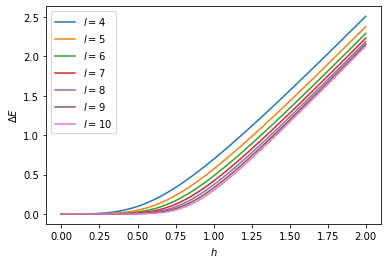

In [6]:
for i in range(7):
    plt.plot(h,En[i,:],label = "$l=%d$" %(i+4))
plt.xlabel(r"$h$")
plt.ylabel(r"$\Delta E$")
plt.legend()
#plt.savefig('ising.pdf')
plt.show();

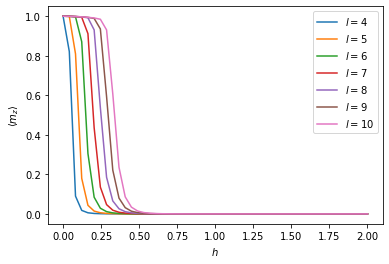

In [7]:
for i in range(7):
    plt.plot(h,mz[i,:],label = "$l=%d$" %(i+4))
plt.xlabel(r"$h$")
plt.ylabel(r"$\langle m_z \rangle$")
plt.legend()
plt.show()

In [8]:
j = 1
g = 1
N = 6
grid = 50
h = np.linspace(0,2,grid)
En = np.zeros((grid,2**N))
for k in range(grid):
    ham = h_tfim(j,h[k],N)
    e, v = la.eigh(ham)
    for l in range(e.shape[0]):
        En[k,l] = e[l] #- e[0]
        
    u, count = np.unique(En[k,:], return_counts=True)
    print(str(count)+"  "+str(count.shape[0]))

[1 1 1 1 2 2 1 1 1 1 2 2 4 1 2 1 2 2 2 1 1 1 1 3 1 1 1 4 1 1 2 4 3 4 1 2 2]  37
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]  64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

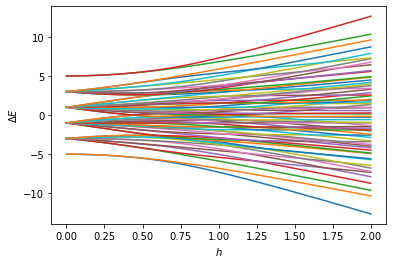

In [9]:
for i in range(2**N):
    plt.plot(h,En[:,i])
plt.xlabel(r"$h$")
plt.ylabel(r"$\Delta E$")
#plt.legend()
#plt.savefig('ising_all.pdf')
plt.show()